In [2]:
%matplotlib inline
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from models.generative.gans.RaSGAN_GP import RaSGAN_GP
from models.generative.utils import *
from data_manipulation.data import Data

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

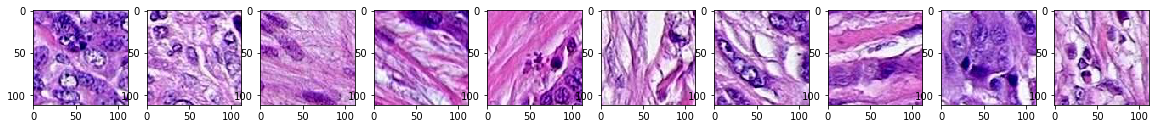

In [3]:
data = Data(dataset='nki', marker='he', patch_h=112, patch_w=112, n_channels=3, batch_size=10)
images, label = data.training.next_batch(10)

plot_images(plt_num=10, images=images, dim=20)

Epochs 1/5: Generator Loss: 2.5524. Discriminator Loss: 0.9959


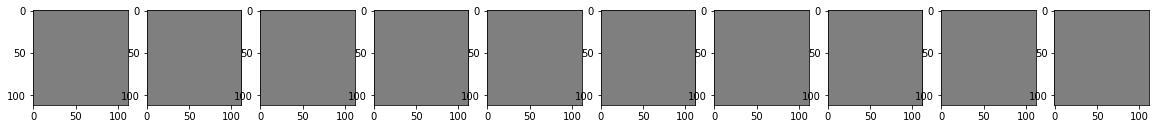

Epochs 1/5: Generator Loss: 10.2714. Discriminator Loss: 0.0169
Epochs 1/5: Generator Loss: 9.3793. Discriminator Loss: 0.0617
Epochs 1/5: Generator Loss: 11.0503. Discriminator Loss: 0.0116
Epochs 1/5: Generator Loss: 12.1954. Discriminator Loss: 0.0075
Epochs 1/5: Generator Loss: 11.0384. Discriminator Loss: 0.0433
Epochs 1/5: Generator Loss: 11.852. Discriminator Loss: 0.0103
Epochs 1/5: Generator Loss: 11.2618. Discriminator Loss: 0.0117
Epochs 1/5: Generator Loss: 11.5331. Discriminator Loss: 0.0117
Epochs 1/5: Generator Loss: 12.0976. Discriminator Loss: 0.017
Epochs 1/5: Generator Loss: 12.8163. Discriminator Loss: 0.0298


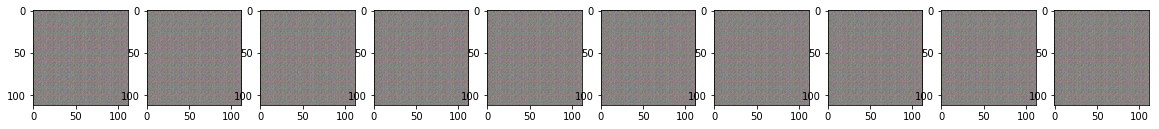

Epochs 1/5: Generator Loss: 10.1027. Discriminator Loss: 0.0156
Epochs 1/5: Generator Loss: 12.7222. Discriminator Loss: 0.0297
Epochs 1/5: Generator Loss: 8.5264. Discriminator Loss: 0.0638
Epochs 1/5: Generator Loss: 11.0605. Discriminator Loss: 0.0246
Epochs 1/5: Generator Loss: 10.3508. Discriminator Loss: 0.0143
Epochs 1/5: Generator Loss: 9.8035. Discriminator Loss: 0.0258
Epochs 1/5: Generator Loss: 11.641. Discriminator Loss: 0.0221
Epochs 1/5: Generator Loss: 10.2292. Discriminator Loss: 0.0138
Epochs 1/5: Generator Loss: 10.3873. Discriminator Loss: 0.0157
Epochs 1/5: Generator Loss: 11.3433. Discriminator Loss: 0.0107


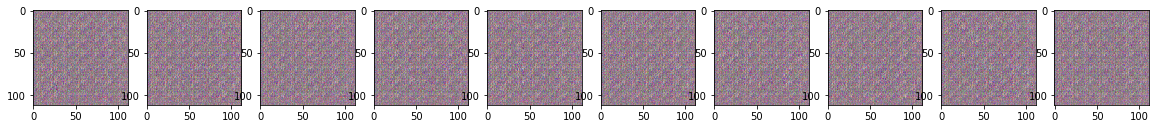

Epochs 1/5: Generator Loss: 9.3066. Discriminator Loss: 0.0264
Epochs 1/5: Generator Loss: 10.5624. Discriminator Loss: 0.013
Epochs 1/5: Generator Loss: 9.5799. Discriminator Loss: 0.0308
Epochs 1/5: Generator Loss: 13.2487. Discriminator Loss: 0.0282
Epochs 1/5: Generator Loss: 9.6474. Discriminator Loss: 0.0228
Epochs 1/5: Generator Loss: 10.5347. Discriminator Loss: 0.0142
Epochs 1/5: Generator Loss: 9.6237. Discriminator Loss: 0.0213
Epochs 1/5: Generator Loss: 9.8661. Discriminator Loss: 0.0485
Epochs 1/5: Generator Loss: 9.1972. Discriminator Loss: 0.0343
Epochs 1/5: Generator Loss: 8.289. Discriminator Loss: 0.0494


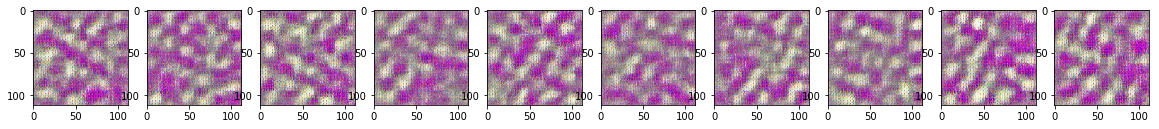

Epochs 1/5: Generator Loss: 7.2151. Discriminator Loss: 0.0729
Epochs 1/5: Generator Loss: 9.1079. Discriminator Loss: 0.1894
Epochs 1/5: Generator Loss: 8.3863. Discriminator Loss: 0.0444
Epochs 1/5: Generator Loss: 7.6105. Discriminator Loss: 0.0566
Epochs 1/5: Generator Loss: 8.3109. Discriminator Loss: 0.1023
Epochs 1/5: Generator Loss: 6.9733. Discriminator Loss: 0.0779


In [ ]:
main_path = '/Users/adalbertoclaudioquiros/Documents/Code/UofG/PhD/Cancer_TMA_Generative/data model output/RaSGAN_GP/'
 
# Dataset information.
image_width = 112
image_height = 112
image_channels = 3
dataset='nki'
marker='he'
name_run = 'h%s_w%s_n%s' % (image_height, image_width, image_channels)
data_out_path = '%s/%s' % (main_path, name_run)


# Hyperparameters.
epochs = 5
batch_size = 64
z_dim = 100
learning_rate = 1e-4
alpha = 0.2
beta_1 = 0.5
beta_2 = 0.9

# WGAN specific parameters
n_critic = 5
gp_coeff = .5
use_bn = False

data = Data(dataset, marker, image_height, image_width, image_channels, batch_size)

with tf.Graph().as_default():
    rasgan_gp = RaSGAN_GP(data, z_dim, use_bn, alpha, beta_1, beta_2, n_critic, gp_coeff, learning_rate, model_name='RaSGAN_GP')
    losses = rasgan_gp.train(epochs, data_out_path, data)
    

In [ ]:
save_loss(losses, data_out_path, dim=20)